# 4.10. Metody liniowe, a nieliniowe

Do tej pory zakładaliśmy o danych, iż istnieje między nimi liniowa relacja, tzn. wartość cechy, którą przewidujemy, jest liniową kombinacją wartości innych zmiennych. Często jednak nie jest to prawda i modele liniowe nie są w stanie w pełni oddać struktury danych.

## Problem nieliniowy

Stworzymy zbiór danych, w którym sami zaszyjemy pewną nieliniową relację pomiędzy składowymi cechami.

In [1]:
import pandas as pd
import numpy as np

In [29]:
np.random.seed(2020)
x = np.linspace(0, 10, 12)
xy_df = pd.DataFrame({
    "x": x,
    "y": x ** 2 - 7 * x + 2 * np.random.normal(size=12)
})
xy_df.sample(n=5)

,x,y
0,0.000000,-3.537691
3,2.727273,-12.955753
10,9.090909,17.405597
11,10.000000,32.624070
8,7.272727,2.803697


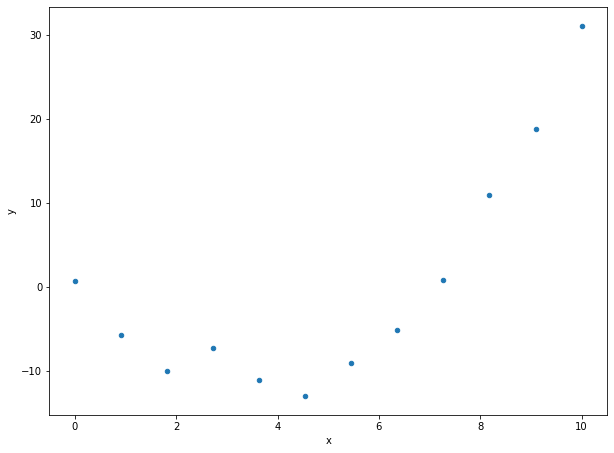

In [19]:
xy_df.plot.scatter(x="x", y="y", 
                   figsize=(10.0, 7.5))

## Próba rozwiązania metodami liniowymi

Spróbujemy zbudować liniowy predyktor dla naszego problemu i zobaczymy jak dobrze jest on w stanie przewidzieć wartość $ y $ na podstawie $ x $.

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
import matplotlib.pyplot as plt

In [22]:
def draw_line(a, b, x_min=-5, x_max=5, 
              c=(.75, .1, .1, .25)):
    x = np.linspace(x_min, x_max, 1000)
    y = a * x + b
    plt.plot(x, y, "-r", c=c)

In [23]:
lr = LinearRegression()
lr.fit(xy_df[["x"]], xy_df["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

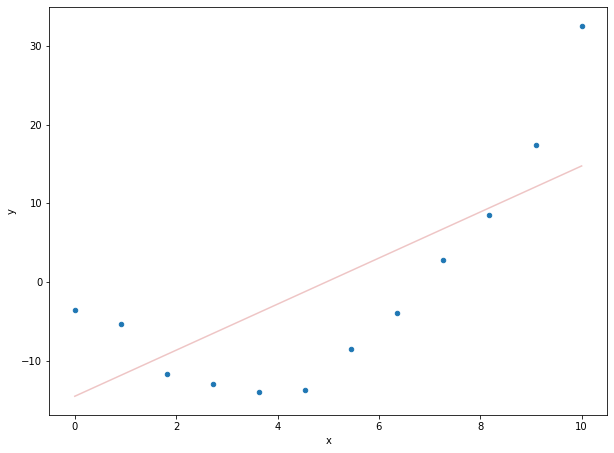

In [31]:
xy_df.plot.scatter(x="x", y="y", 
                   figsize=(10.0, 7.5))
draw_line(lr.coef_[0], lr.intercept_, x_min=0, x_max=10)

## Złożoność modelu

Z zasady preferujemy jak najprostsze modele. Nie oznacza to, że dobieramy zawsze model liniowy, gdyż dla problemów o innej charakterystyce, niezbędne będzie wybranie bardziej skomplikowanej metody. 

Dla powyższego przykładu moglibyśmy dobrać np. parabolę, czyli wykres funkcji kwadratowej. Wiemy to jednak głównie dlatego, że sami wygenerowaliśmy dane używając funkcji kwadratowej z pewnym losowym szumem. Gdybyśmy jednak wybrali jeszcze bardziej skomplikowaną metodę, to moglibyśmy wylądować z poniższym modelem:

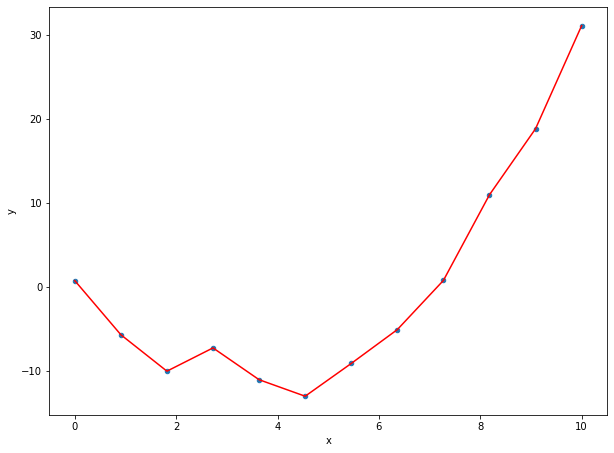

In [27]:
xy_df.plot.scatter(x="x", y="y", 
                   figsize=(10.0, 7.5))
plt.plot(xy_df["x"], xy_df["y"], "-r") 